In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Jncl8e33CSgJreYa98NfVpZpGkHAmSK5BgvdqKJxSX4K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'auditaiamachinelearningfordetecti-donotdelete-pr-78kkkvdlwdegks'
object_key = 'audit_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
df = df.drop(columns=['LOCATION_ID','Score_A','Score_B','Risk_C','Risk_D','PROB','RiSk_E','History','Prob','CONTROL_RISK','Detection_Risk'])

In [7]:
df.head()

,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,TOTAL,numbers,Money_Value,Score_MV,District_Loss,Risk_F,Score,Inherent_Risk,Audit_Risk,Risk
0,3.89,4.18,2.508,2.50,0.500,6.68,5.0,3.38,0.2,2,0.0,2.4,8.574,1.7148,1
1,3.89,0.00,0.000,4.83,0.966,4.83,5.0,0.94,0.2,2,0.0,2.0,2.554,0.5108,0
2,3.89,0.51,0.102,0.23,0.046,0.74,5.0,0.00,0.2,2,0.0,2.0,1.548,0.3096,0
3,3.89,0.00,0.000,10.80,6.480,10.80,6.0,11.75,0.6,2,0.0,4.4,17.530,3.5060,1
4,3.89,0.00,0.000,0.08,0.016,0.08,5.0,0.00,0.2,2,0.0,2.0,1.416,0.2832,0


In [8]:
df['Money_Value'].fillna(df['Money_Value'].mean(),inplace=True)

In [9]:
df.isnull().sum()

Sector_score     0
PARA_A           0
Risk_A           0
PARA_B           0
Risk_B           0
TOTAL            0
numbers          0
Money_Value      0
Score_MV         0
District_Loss    0
Risk_F           0
Score            0
Inherent_Risk    0
Audit_Risk       0
Risk             0
dtype: int64

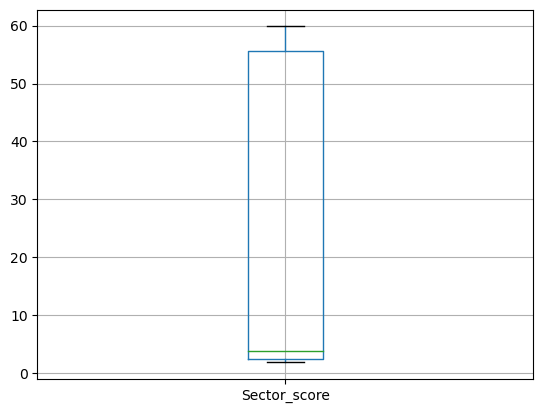

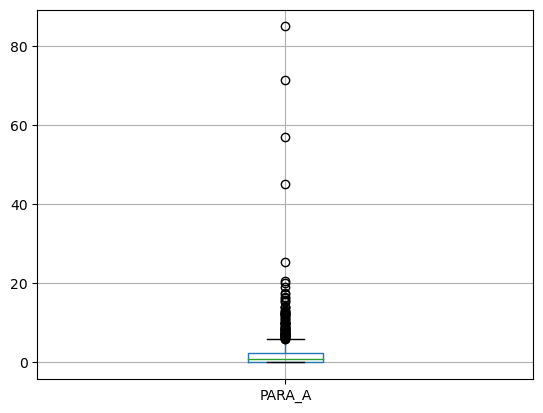

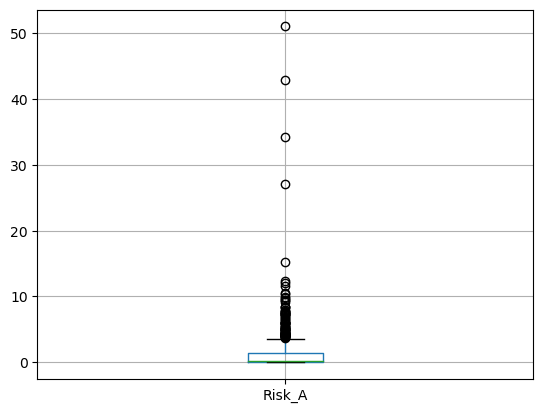

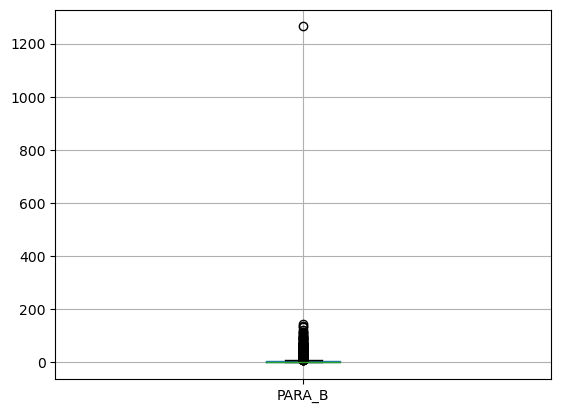

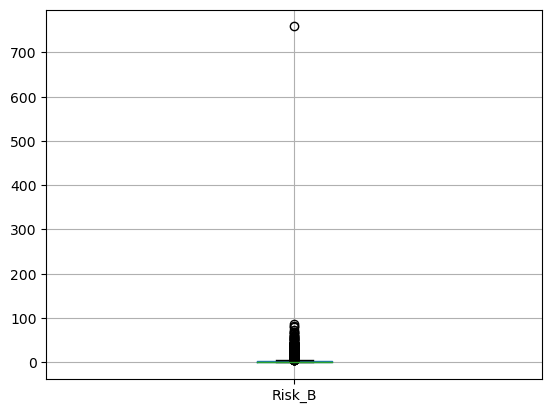

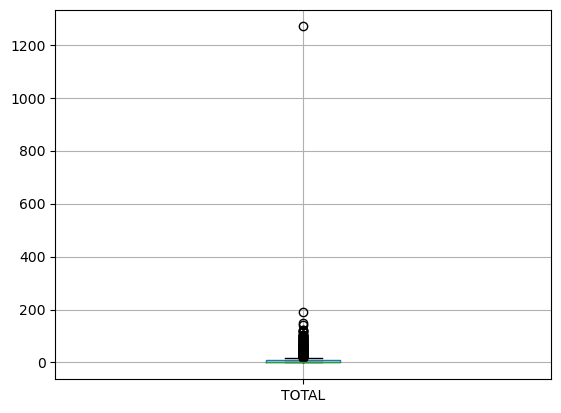

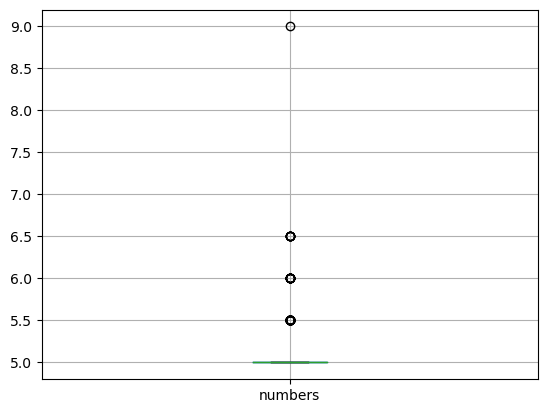

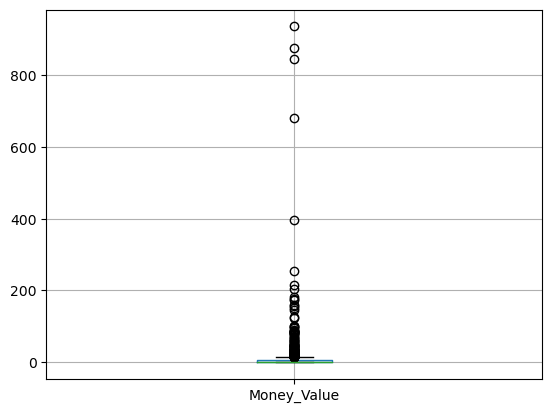

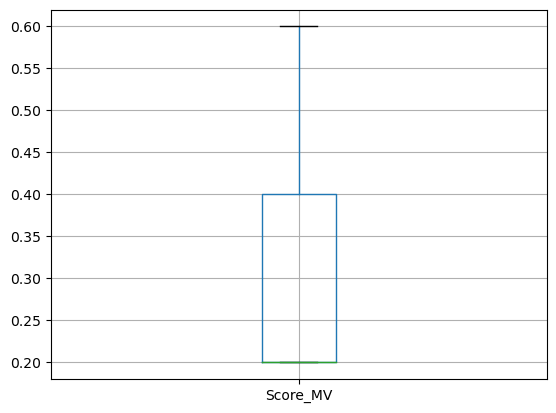

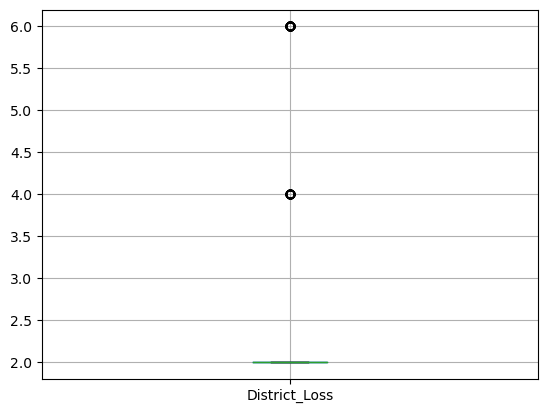

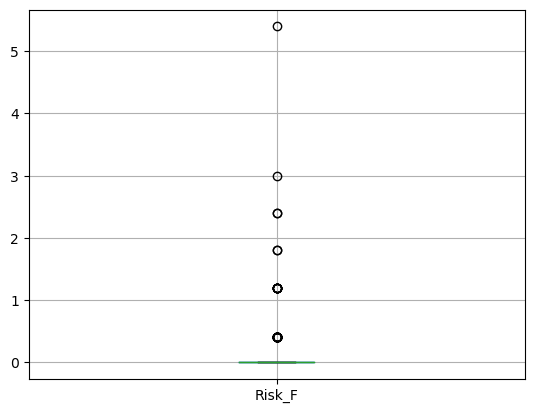

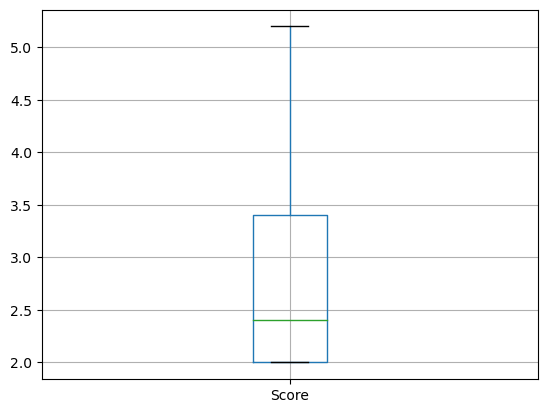

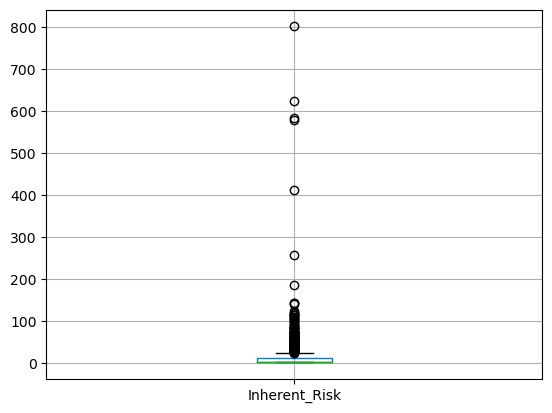

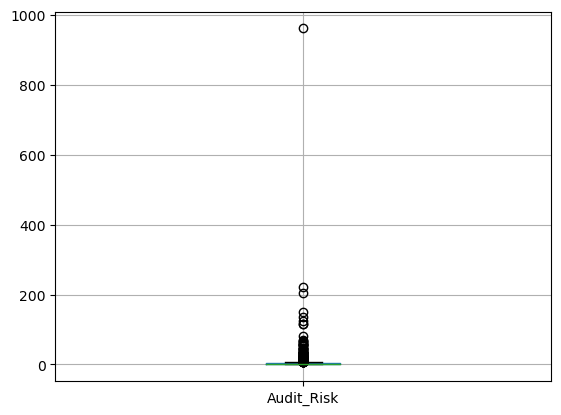

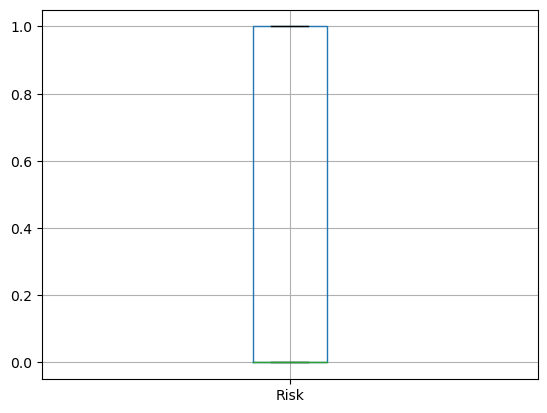

In [10]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [11]:
def iqr(df):
    iqr = df.quantile(0.75) - df.quantile(0.25)
    upper_range = df.quantile(0.75) + (1.5 * iqr)
    lower_range = df.quantile(0.25) - (1.5 * iqr)
    return upper_range , lower_range


upper,lower=iqr(df)

In [12]:
upper , lower

(Sector_score     135.3700
 PARA_A             5.8850
 Risk_A             3.6570
 PARA_B            10.4000
 Risk_B             4.9500
 TOTAL             18.5900
 numbers            5.0000
 Money_Value       14.2250
 Score_MV           0.7000
 District_Loss      2.0000
 Risk_F             0.0000
 Score              5.5000
 Inherent_Risk     24.5790
 Audit_Risk         7.6698
 Risk               2.5000
 dtype: float64,
 Sector_score    -77.430
 PARA_A           -3.195
 Risk_A           -2.127
 PARA_B           -6.240
 Risk_B           -2.970
 TOTAL           -10.290
 numbers           5.000
 Money_Value      -8.535
 Score_MV         -0.100
 District_Loss     2.000
 Risk_F            0.000
 Score            -0.100
 Inherent_Risk   -12.213
 Audit_Risk       -4.095
 Risk             -1.500
 dtype: float64)

In [13]:
r = ['Sector_score', 'PARA_A',
     'Risk_A', 'PARA_B', 
     'Risk_B','Score_MV',
     'Inherent_Risk',
     'Audit_Risk','Risk']

fig,ax=plt.subplots(4 , 2 , figsize=(25,15)) 
for i,subplot in zip(r,ax.flatten()): 
    sns.boxplot(df[i], ax=subplot,color='g')

### Descriptive Statistics

In [14]:
df.describe()

,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,TOTAL,numbers,Money_Value,Score_MV,District_Loss,Risk_F,Score,Inherent_Risk,Audit_Risk,Risk
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,20.255149,2.457983,1.355928,10.841903,6.358590,13.268062,5.067917,14.191093,0.291332,2.507115,0.053816,2.705304,17.743158,7.194763,0.394567
std,24.339709,5.688509,3.446223,50.176308,30.128623,51.406241,0.264928,66.687203,0.159954,1.230659,0.306411,0.859470,54.837264,38.740186,0.489074
min,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.400000,0.280000,0.000000
25%,2.370000,0.210000,0.042000,0.000000,0.000000,0.540000,5.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.584000,0.316800,0.000000
50%,3.890000,0.880000,0.176000,0.410000,0.082000,1.390000,5.000000,0.090000,0.200000,2.000000,0.000000,2.400000,2.218000,0.577600,0.000000
75%,55.570000,2.480000,1.488000,4.160000,1.980000,7.760000,5.000000,5.690000,0.400000,2.000000,0.000000,3.400000,10.782000,3.258000,1.000000
max,59.850000,85.000000,51.000000,1264.630000,758.778000,1268.910000,9.000000,935.030000,0.600000,6.000000,5.400000,5.200000,801.262000,961.514400,1.000000


### Visual Analysis

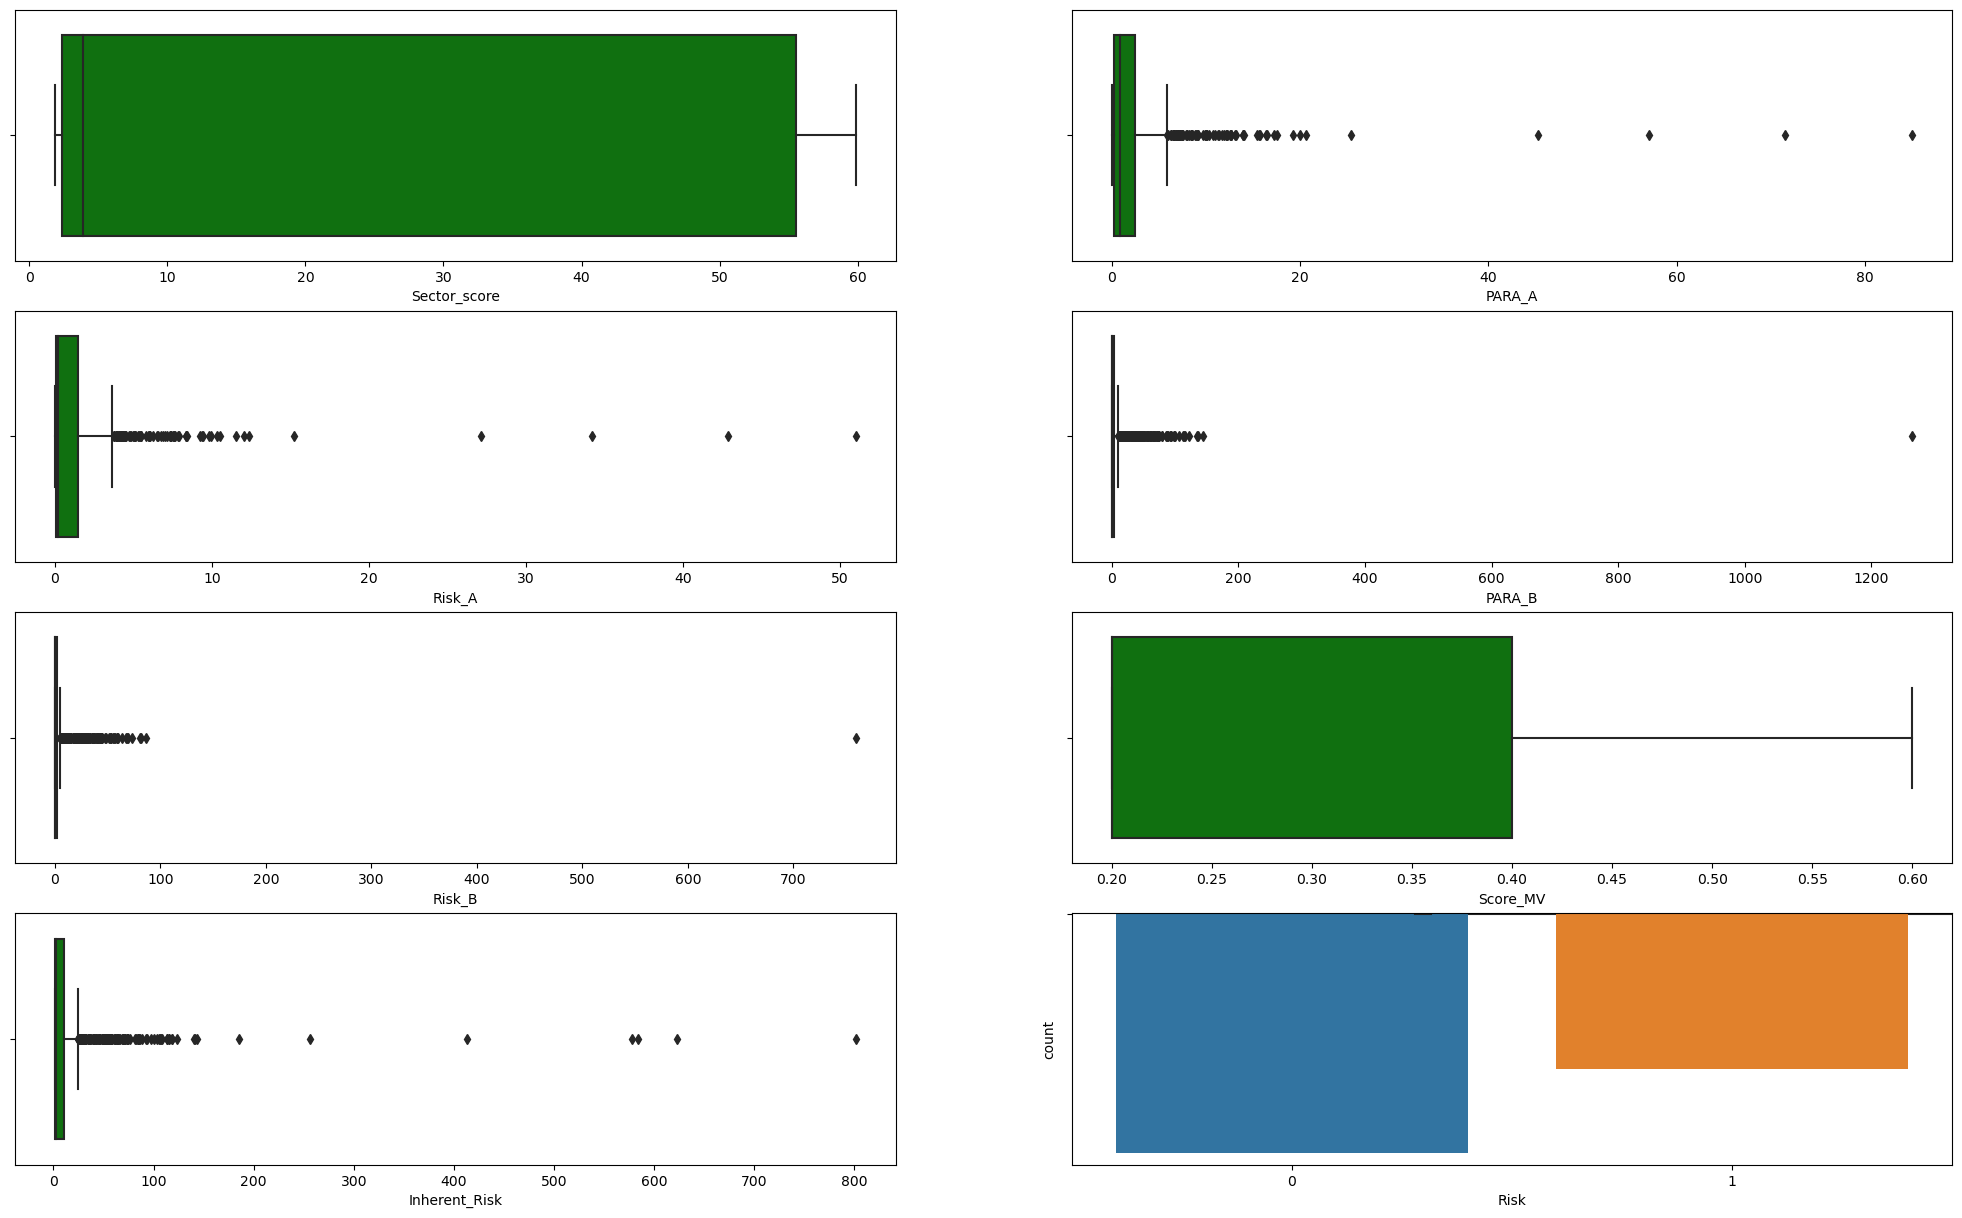

In [13]:
#univariate analysis
sns.countplot(df['Risk'])
plt.show()

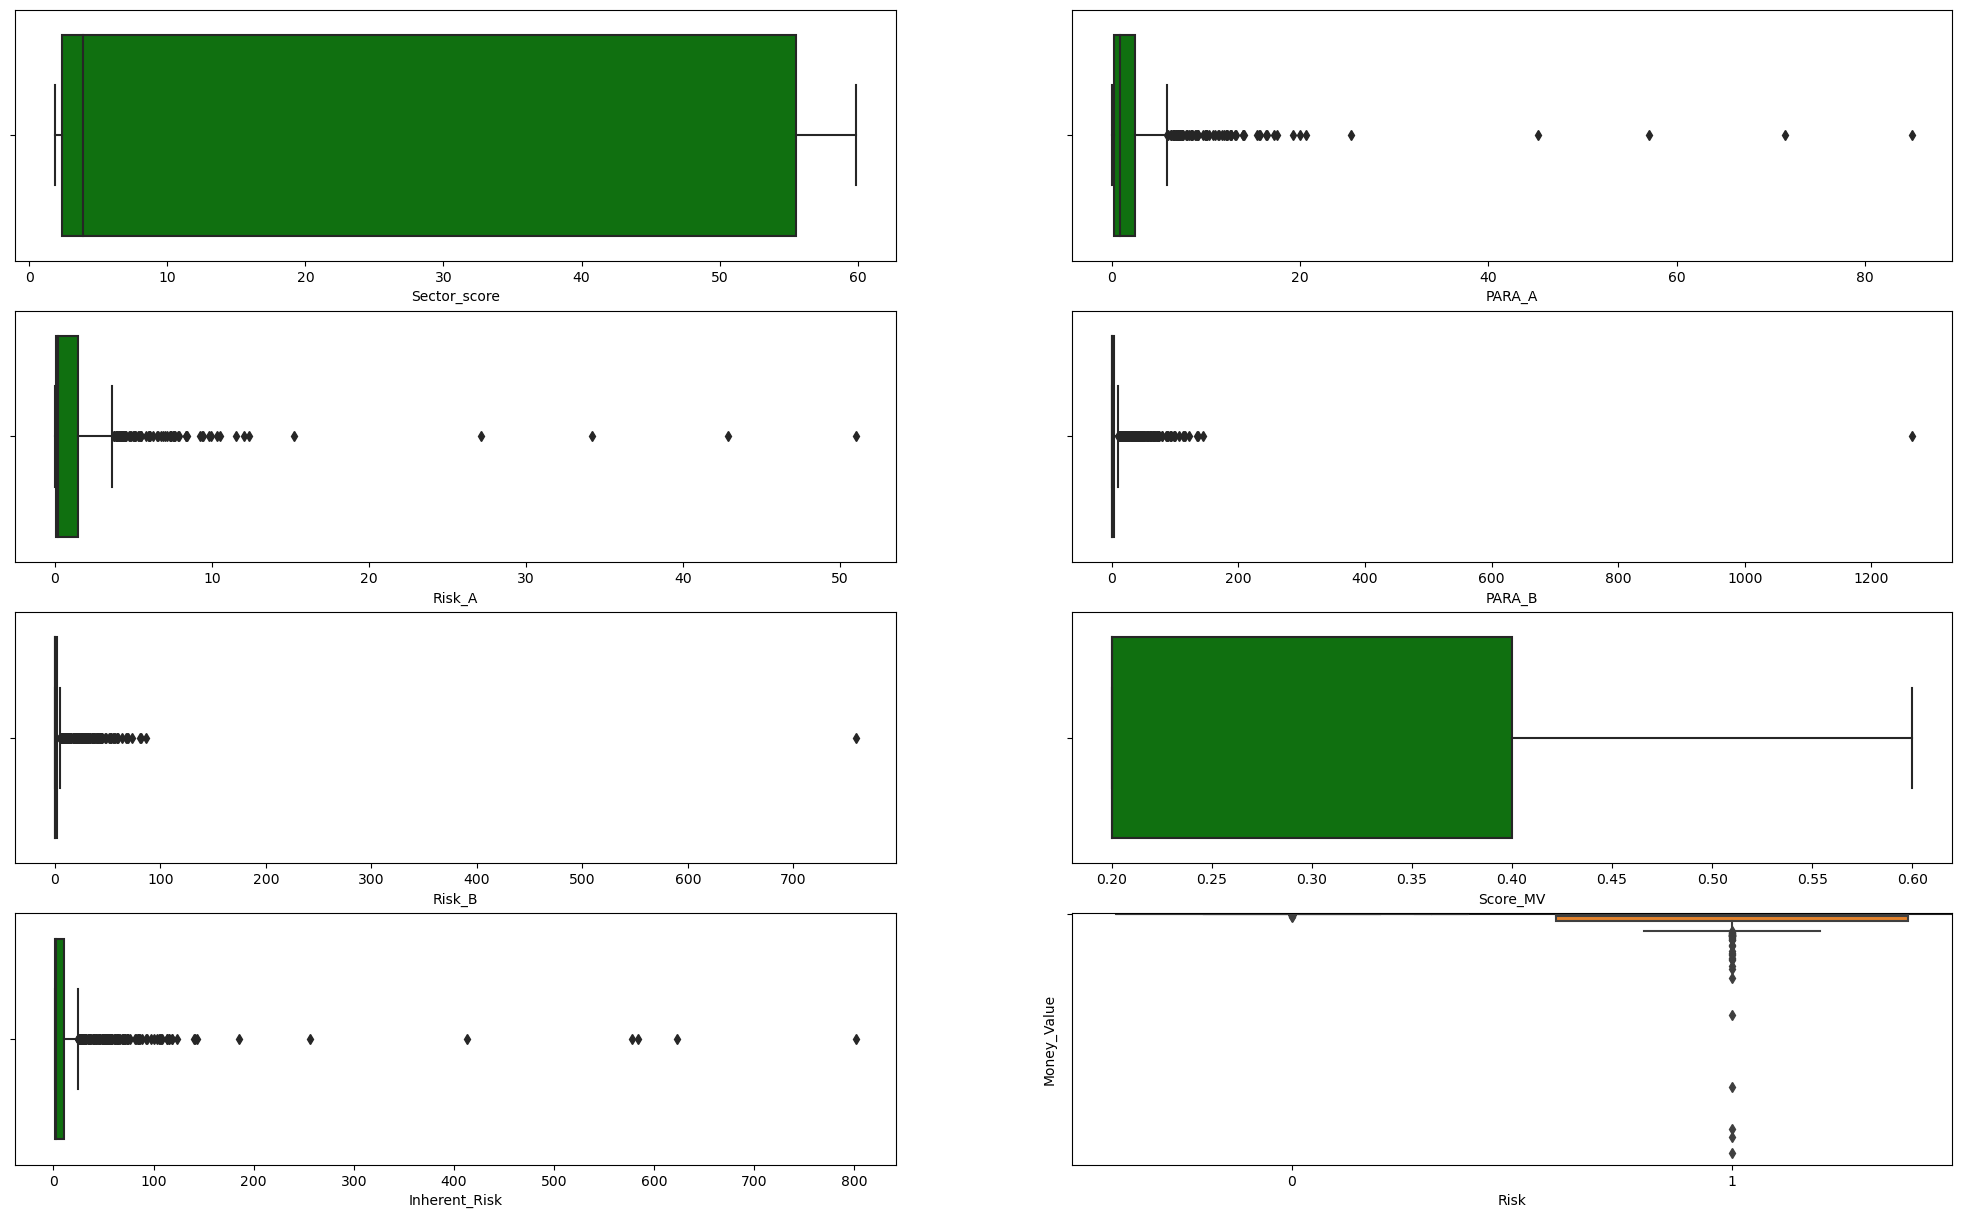

In [15]:
#Bivariate analysis
sns.boxplot(x='Risk',y='Money_Value',data=df)
plt.show()

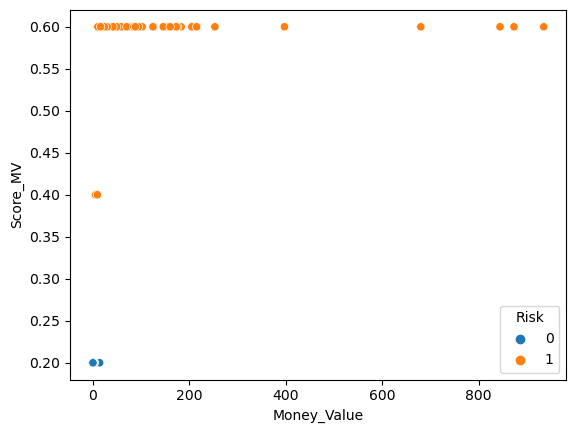

In [16]:
sns.scatterplot(x='Money_Value',y='Score_MV',hue='Risk',data=df)
plt.show()

In [173]:
#Multivariate analysis (interrupted by keyboard)
sns.pairplot(df)

KeyboardInterrupt: 

### Splitting data into train and test

In [17]:
#y -dependant variable
y = df['Risk']
#x = independant variables
x = df.drop(columns=['Risk'], axis=1)

In [18]:
x


,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,TOTAL,numbers,Money_Value,Score_MV,District_Loss,Risk_F,Score,Inherent_Risk,Audit_Risk
0,3.89,4.18,2.508,2.50,0.500,6.68,5.0,3.38,0.2,2,0.0,2.4,8.574,1.7148
1,3.89,0.00,0.000,4.83,0.966,4.83,5.0,0.94,0.2,2,0.0,2.0,2.554,0.5108
2,3.89,0.51,0.102,0.23,0.046,0.74,5.0,0.00,0.2,2,0.0,2.0,1.548,0.3096
3,3.89,0.00,0.000,10.80,6.480,10.80,6.0,11.75,0.6,2,0.0,4.4,17.530,3.5060
4,3.89,0.00,0.000,0.08,0.016,0.08,5.0,0.00,0.2,2,0.0,2.0,1.416,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,55.57,0.49,0.098,0.40,0.080,0.89,5.0,0.00,0.2,2,0.0,2.0,1.578,0.3156
769,55.57,0.47,0.094,0.37,0.074,0.84,5.0,0.00,0.2,2,0.0,2.0,1.568,0.3136
770,55.57,0.24,0.048,0.04,0.008,0.28,5.0,0.00,0.2,2,0.0,2.0,1.456,0.2912
771,55.57,0.20,0.040,0.00,0.000,0.20,5.0,0.00,0.2,2,0.0,2.0,1.440,0.2880


In [19]:
y


0      1
1      0
2      0
3      1
4      0
      ..
768    0
769    0
770    0
771    0
772    0
Name: Risk, Length: 773, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=72)

In [21]:
len(x_train),len(x_test)

(541, 232)

In [22]:
len(y_train) , len(y_test)

(541, 232)

### Training The Model In Multiple Algorithms

In [23]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [24]:
logi=LogisticRegression()

In [25]:
logi.fit(x_train,y_train)

LogisticRegression()

### Evaluation of model with training data

In [26]:
y_test_pred = logi.predict(x_test)

In [27]:
y_test.shape

(232,)

In [28]:
y_test_pred.shape

(232,)

### Random forest model

In [29]:
from sklearn. ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(criterion='entropy')

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [34]:
## With Random Forest Checking Training Data

In [35]:
y_train_pred = rfc.predict(x_train)

In [36]:
y_test

683    0
249    0
396    1
206    1
613    0
      ..
599    0
517    0
770    0
293    0
280    0
Name: Risk, Length: 232, dtype: int64

### Xgboost Boosting

In [65]:
import xgboost as xgb

In [66]:
model=xgb.XGBClassifier()

In [67]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
##Evaluation of Model with XG Boost Technique for Training Data

In [69]:
Xg_test_pred = model.predict(x_test)

In [196]:
Xg_train_pred[:5]

array([0, 0, 1, 0, 1])

### KNN model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
knn_pred=knn.predict(x_test)

### Testing the model

In [201]:
knn.predict([[2.37,0.50,0.100,0.04,0.008,0.54,5.0,0.000,0.2,6,0,2.4,2.3080,1.38480]])

array([1], dtype=int64)

In [202]:
knn.predict([[3.89,0.00,0.00,0.04,0.008,0.54,5.0,0.000,0.2,6,0,2.4,2.3080,1.38480]])

array([1], dtype=int64)

### Performance testing

In [55]:
#logistic regression
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_test_pred)

array([[143,   1],
       [  4,  84]], dtype=int64)

In [56]:
accuracy_score(y_test,y_test_pred)*100

97.84482758620689

In [57]:
#classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.99      0.95      0.97        88

    accuracy                           0.98       232
   macro avg       0.98      0.97      0.98       232
weighted avg       0.98      0.98      0.98       232



In [58]:
# Random forest
confusion_matrix(y_test,y_test_pred)

array([[143,   1],
       [  4,  84]], dtype=int64)

In [59]:
###accuracy for test data with random forest

In [60]:
accuracy_score(y_test,y_test_pred)*100

97.84482758620689

In [61]:
#classification report for test data of random forest

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.99      0.95      0.97        88

    accuracy                           0.98       232
   macro avg       0.98      0.97      0.98       232
weighted avg       0.98      0.98      0.98       232



In [70]:
### confusion matrix for testing data with xg boost
confusion_matrix(y_test,Xg_test_pred)

array([[144,   0],
       [  1,  87]], dtype=int64)

In [71]:
### accuracy score for testing data with XG boost

In [72]:
accuracy_score(y_test,Xg_test_pred)*100

99.56896551724138

In [73]:
### classification report for testing data with XG boost

In [74]:
print(classification_report(y_test,Xg_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       144
           1       1.00      0.99      0.99        88

    accuracy                           1.00       232
   macro avg       1.00      0.99      1.00       232
weighted avg       1.00      1.00      1.00       232



In [75]:
##KNN Model

In [79]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       144
           1       1.00      0.94      0.97        88

    accuracy                           0.98       232
   macro avg       0.98      0.97      0.98       232
weighted avg       0.98      0.98      0.98       232



In [80]:
accuracy_score(y_test,knn_pred)*100

97.84482758620689

In [82]:
confusion_matrix(y_test,knn_pred)

array([[144,   0],
       [  5,  83]], dtype=int64)

### Hyperparameter space( testing)

In [84]:
#Define the hyperparameter space
param_grid = {'n_neighbors':[3,5,7,9],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
knn = GridSearchCV(knn, param_grid, cv=5,n_jobs=-1)

In [87]:
knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [88]:
#print the best hyperparameters and corresponding mean cross-validation score

In [90]:
print("Best Hyperparameters: ",knn.best_params_)
print("Best mean cross-validated score:{:.2f}".format(knn.best_score_))

Best Hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best mean cross-validated score:0.98


### Pickle

In [91]:
import pickle
pickle.dump(knn,open('knn.pkl','wb'))

### Deployment

In [50]:
!pip install -U ibm-watson-machine-learning

In [51]:
from ibm_watson_machine_learning import APIClient

In [52]:
wml_credentials={
    "apikey":"Sqq_MrTbSVGoX1xdHzJd0JhhIlvMN5DC7_G5uAmWbcMw",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [53]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------  ------------------------
ID                                    NAME     CREATED
50a5c765-8423-453d-b7a5-7f43a52c4c15  AuditAI  2023-05-19T16:23:56.704Z
------------------------------------  -------  ------------------------


,ID,NAME,CREATED
0,50a5c765-8423-453d-b7a5-7f43a52c4c15,AuditAI,2023-05-19T16:23:56.704Z


In [54]:
space_id ="50a5c765-8423-453d-b7a5-7f43a52c4c15"

In [55]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [56]:
wml_client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-unsupported  pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,create-unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [57]:
MODEL_NAME="Model1"
DEPLOYMENT_NAME="AuditAI"
DEMO_MODEL = logi

In [68]:
#set python version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [69]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [70]:
#save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [71]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Risk',
  'schemas': {'input': [{'fields': [{'name': 'Sector_score',
       'type': 'float64'},
      {'name': 'PARA_A', 'type': 'float64'},
      {'name': 'Risk_A', 'type': 'float64'},
      {'name': 'PARA_B', 'type': 'float64'},
      {'name': 'Risk_B', 'type': 'float64'},
      {'name': 'TOTAL', 'type': 'float64'},
      {'name': 'numbers', 'type': 'float64'},
      {'name': 'Money_Value', 'type': 'float64'},
      {'name': 'Score_MV', 'type': 'float64'},
      {'name': 'District_Loss', 'type': 'int64'},
      {'name': 'Risk_F', 'type': 'float64'},
      {'name': 'Score', 'type': 'float64'},
      {'name': 'Inherent_Risk', 'type': 'float64'},
      {'name': 'Audit_Risk', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    '

In [72]:
model_id=wml_client.repository.get_model_id(model_details)

In [73]:
model_id

'afe8e1bc-03e8-4112-9bee-6c1025a0e08e'

In [74]:
#set meta and deplo
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [75]:
#deploy
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props

)



#######################################################################################

Synchronous deployment creation for uid: 'afe8e1bc-03e8-4112-9bee-6c1025a0e08e' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='937225dc-23aa-409b-accb-c8efeacc43de'
------------------------------------------------------------------------------------------------


